In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [ ]:
models = []
model = pd.read_excel("rightWrong_DT_all.xlsx")
model_DT_ALL= np.array(model)
models.append(model_DT_ALL)

model = pd.read_excel("rightWrong_DT_noX.xlsx")
model_DT_noX= np.array(model)
models.append(model_DT_noX)

model = pd.read_excel("rightWrong_DT_noY.xlsx")
model_DT_noY= np.array(model)
models.append(model_DT_noY)

model = pd.read_excel("rightWrong_DT_noZ.xlsx")
model_DT_noZ = np.array(model)
models.append(model_DT_noZ)

model = pd.read_excel("rightWrong_KNN_all.xlsx")
model_KNN_all = np.array(model)
models.append(model_KNN_all)

model = pd.read_excel("rightWrong_KNN_noX.xlsx")
model_KNN_noX = np.array(model)
models.append(model_KNN_noX)

model = pd.read_excel("rightWrong_KNN_noY.xlsx")
model_KNN_noY = np.array(model)
models.append(model_KNN_noY)

model = pd.read_excel("rightWrong_KNN_noZ.xlsx")
model_KNN_noZ = np.array(model)
models.append(model_KNN_noZ)

model = pd.read_excel("rightWrongXYZ.xlsx")
model_ANN_all = np.array(model)
models.append(model_ANN_all)

model = pd.read_excel("rightWrongYZ.xlsx")
model_ANN_noX = np.array(model)
models.append(model_ANN_noX)

model = pd.read_excel("rightWrongXZ.xlsx")
model_ANN_noY = np.array(model)
models.append(model_ANN_noY)

model = pd.read_excel("rightWrongXY.xlsx")
model_ANN_noZ = np.array(model)
models.append(model_ANN_noZ)

model = pd.read_excel("rightWrong_baseline.xlsx")
model_baseline = np.array(model)
models.append(model_baseline)

n = 1600
alpha = 0.05

def mcnemar(results1, results2, n, alpha):
    n12 = ((results1-results2)==-1).sum()
    n21 = ((results1-results2)==1).sum()


    thetahat = (n12-n21)/n
    Etheta = thetahat

    Q = n**2 * (n+1) * (Etheta+1) * (1-Etheta) / ( (n*(n12+n21) - (n12-n21)**2) )

    p = (Etheta + 1)*0.5 * (Q-1)
    q = (1-Etheta)*0.5 * (Q-1)

    p = 2*scipy.stats.binom.cdf(min([n12,n21]), n=n12+n21, p=0.5)

    return p

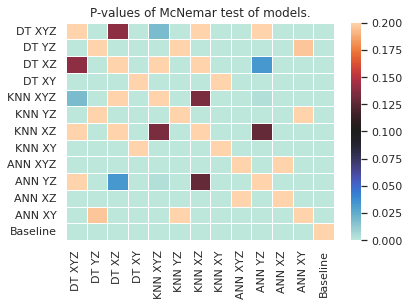

In [ ]:
data_HM = np.empty((13,13))
cmap="icefire"

for i in range(13):
    for j in range(13):
        if j != i:
            data_HM[i,j] = mcnemar(models[i],models[j],1600,0.05)
        else:
            data_HM[i,j] = 0.5
        
# sns.heatmap(data_HM)
print_categories = ["DT XYZ","DT YZ","DT XZ","DT XY","KNN XYZ","KNN YZ","KNN XZ","KNN XY","ANN XYZ","ANN YZ","ANN XZ","ANN XY","Baseline"]

# data_HM[data_HM<0.05] = 0
data_HM[data_HM>0.2] = 0.2

ax = sns.heatmap(data_HM,
                 annot=False,
                #  fmt=".3f",
                 xticklabels=print_categories,
                 yticklabels=print_categories,
                 linewidths=.5,
                #  linecolor = "grey",
                 cmap = cmap)
ax.set_title('P-values of McNemar test of models.')
plt.show()

![Picture title](image-20220114-134928.png)

In [ ]:
colorscheme = ['red','blue','green','purple','red','blue','green','purple','red','blue','green','purple','black']
def jeffrey_interval(yhat, alpha=0.05):
    y = np.zeros(1600)
    yhat = yhat.reshape(1600)
    m = sum(y - yhat == 0)
    n = y.size
    a = m+.5
    b = n-m + .5
    CI = scipy.stats.beta.interval(1-alpha, a=a, b=b)
    thetahat = a/(a+b)
    return thetahat, CI


def plotting_the_jeffreys():
    #ANN
    rightWrongXYZ = pd.read_excel("rightWrongXYZ.xlsx").to_numpy()
    rightWrongXY  = pd.read_excel("rightWrongXY.xlsx").to_numpy()
    rightWrongXZ  = pd.read_excel("rightWrongXZ.xlsx").to_numpy()
    rightWrongYZ  = pd.read_excel("rightWrongYZ.xlsx").to_numpy()
    thetahat, CI_XYZ = jeffrey_interval(rightWrongXYZ)
    thetahat, CI_XY  = jeffrey_interval(rightWrongXY)
    thetahat, CI_XZ  = jeffrey_interval(rightWrongXZ)
    thetahat, CI_YZ  = jeffrey_interval(rightWrongYZ)

    #DT 
    rightWrongDTXYZ = pd.read_excel("rightWrong_DT_all.xlsx").to_numpy()
    rightWrongDTXY  = pd.read_excel("rightWrong_DT_noZ.xlsx").to_numpy()
    rightWrongDTXZ  = pd.read_excel("rightWrong_DT_noY.xlsx").to_numpy()
    rightWrongDTYZ  = pd.read_excel("rightWrong_DT_noX.xlsx").to_numpy()
    thetahat, CI_DT_XYZ = jeffrey_interval(rightWrongDTXYZ)
    thetahat, CI_DT_XY  = jeffrey_interval(rightWrongDTXY)
    thetahat, CI_DT_XZ  = jeffrey_interval(rightWrongDTXZ)
    thetahat, CI_DT_YZ  = jeffrey_interval(rightWrongDTYZ)


    #KNN
    rightWrongDTXYZ = pd.read_excel("rightWrong_KNN_all.xlsx").to_numpy()
    rightWrongDTXY  = pd.read_excel("rightWrong_KNN_noZ.xlsx").to_numpy()
    rightWrongDTXZ  = pd.read_excel("rightWrong_KNN_noY.xlsx").to_numpy()
    rightWrongDTYZ  = pd.read_excel("rightWrong_KNN_noX.xlsx").to_numpy()
    thetahat, CI_KNN_XYZ = jeffrey_interval(rightWrongDTXYZ)
    thetahat, CI_KNN_XY  = jeffrey_interval(rightWrongDTXY)
    thetahat, CI_KNN_XZ  = jeffrey_interval(rightWrongDTXZ)
    thetahat, CI_KNN_YZ  = jeffrey_interval(rightWrongDTYZ)
    
    #Baseline
    rightWrongBase  = pd.read_excel("rightWrong_baseline.xlsx").to_numpy()
    thetahat, CI_Base_XYZ = jeffrey_interval(rightWrongBase)


    print(CI_XYZ[0])
    data_dict = {}
    data_dict['category'] = ['ANN XYZ','ANN XZ','ANN XY', 'ANN YZ', 'DT XYZ', 'DT XZ', 'DT XY', 'DT YZ', 'KNN XYZ', 'KNN XZ','KNN XY', 'KNN YZ', 'BaseLine']
    data_dict['lower'] = [1-CI_XYZ[0],1-CI_XZ[0],1-CI_XY[0],1-CI_YZ[0], 1- CI_DT_XYZ[0],1- CI_DT_XZ[0],1- CI_DT_XY[0],1- CI_DT_YZ[0],1- CI_KNN_XYZ[0],1- CI_KNN_XZ[0],1- CI_KNN_XY[0],1- CI_KNN_YZ[0],1- CI_Base_XYZ[0]]
    data_dict['upper'] = [1-CI_XYZ[1],1-CI_XZ[1],1-CI_XY[1],1-CI_YZ[1], 1- CI_DT_XYZ[1],1- CI_DT_XZ[1],1- CI_DT_XY[1],1- CI_DT_YZ[1],1- CI_KNN_XYZ[1],1- CI_KNN_XZ[1],1- CI_KNN_XY[1],1- CI_KNN_YZ[1],1- CI_Base_XYZ[1]]
    dataset = pd.DataFrame(data_dict)
    i = 0
    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-',color=colorscheme[i])
        i += 1
        plt.yticks(range(len(dataset)),list(dataset['category']))
        plt.xlabel("Proportion Correct")
        
        plt.title("95% Confidence Interval")
    #tips = [np.array([CI_XYZ[0],CI_XY[0],CI_XZ[0],CI_YZ[0]]),np.array([CI_XYZ[1],CI_XY[1],CI_XZ[1],CI_YZ[1]])]
    #ax = sns.pointplot(x="variables", y="theta", data=tips, capsize=.2)
    

plotting_the_jeffreys()


NameError: name 'pd' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9cabbf1f-ad60-47b3-af3c-cdf3732148b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>